<a href="https://colab.research.google.com/github/sultanmr/Supervised_learning_project/blob/main/Vehicle_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 300)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [4]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2iLs3mQ4ss2blyN8s09R-VFbt9nMUriYbjrSYoEer3auG1JCk__ZYHl9SbA9ULGvF0Rsaxwl1yt_T/pub?gid=2116627515&single=true&output=csv')
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
data.isnull().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


In [6]:
data.shape==data.drop_duplicates().shape

True

In [7]:
train, test = train_test_split(data,
                               test_size = 0.12,
                               stratify = data['class'],
                               random_state = 19)
print(train.shape)
print(test.shape)

(744, 19)
(102, 19)


In [8]:
train.info()
num_features = train.columns[train.dtypes != 'object']
for col in num_features:
  median_val = train[col].median()
  train[col].fillna(median_val, inplace=True)
  test[col].fillna(median_val, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 110 to 655
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  744 non-null    int64  
 1   circularity                  739 non-null    float64
 2   distance_circularity         740 non-null    float64
 3   radius_ratio                 739 non-null    float64
 4   pr.axis_aspect_ratio         742 non-null    float64
 5   max.length_aspect_ratio      744 non-null    int64  
 6   scatter_ratio                743 non-null    float64
 7   elongatedness                743 non-null    float64
 8   pr.axis_rectangularity       742 non-null    float64
 9   max.length_rectangularity    744 non-null    int64  
 10  scaled_variance              741 non-null    float64
 11  scaled_variance.1            742 non-null    float64
 12  scaled_radius_of_gyration    742 non-null    float64
 13  scaled_radius_of_gyrati

<ipython-input-8-a75720842b00>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_val, inplace=True)
<ipython-input-8-a75720842b00>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

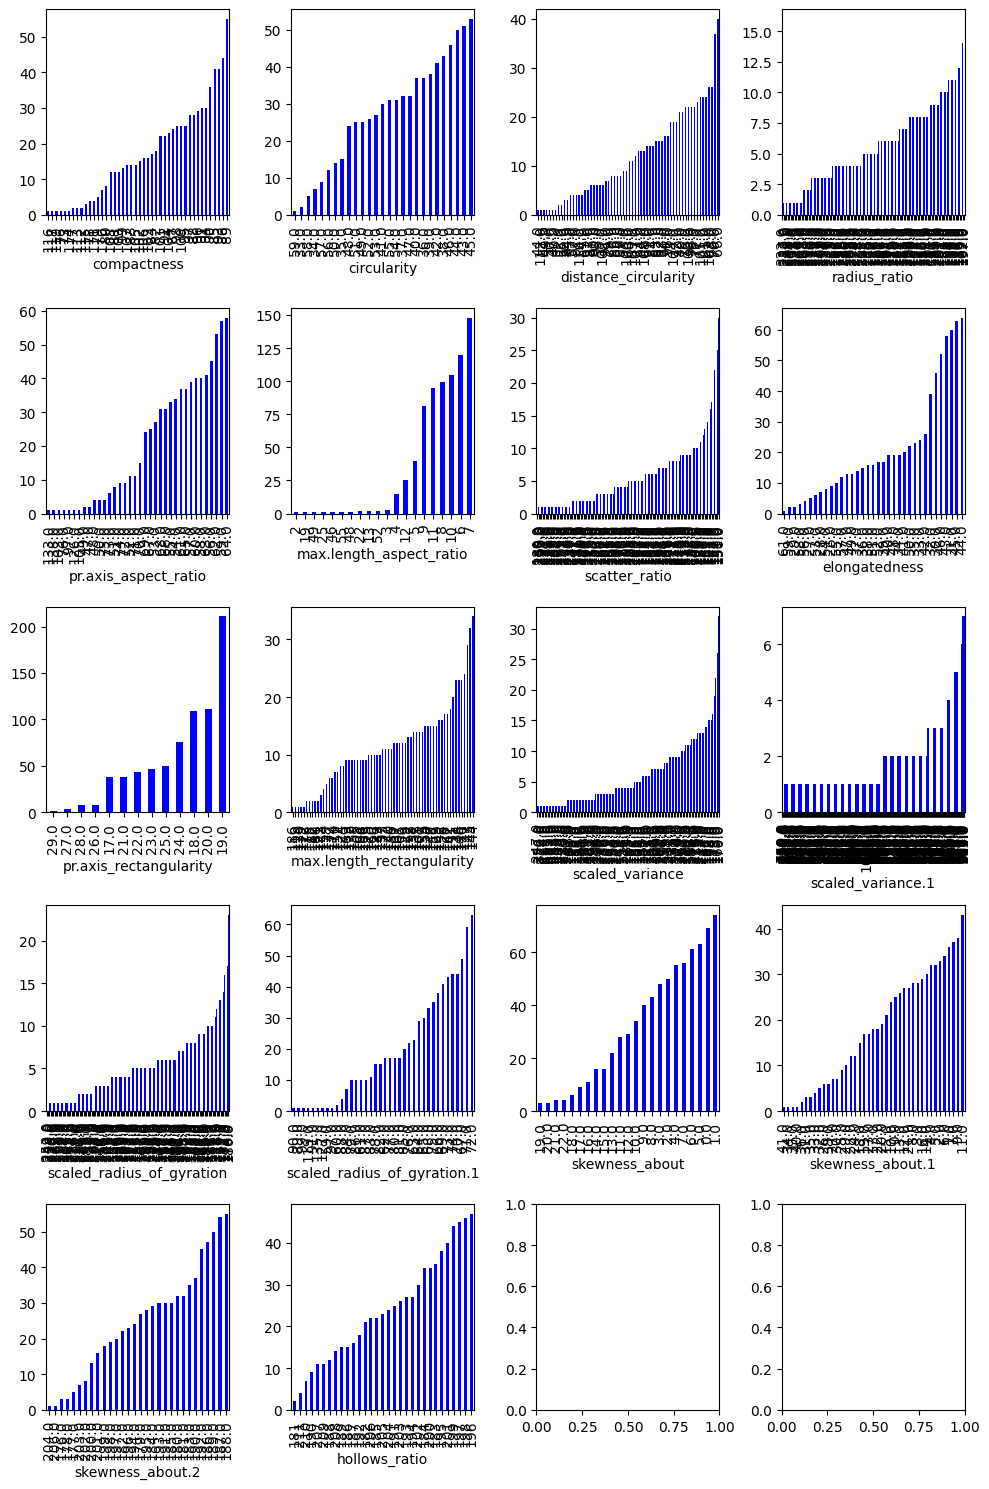

In [9]:
fig, axs = plt.subplots(5,4, figsize = (10,15))
axs = axs.flatten()

for i, col in enumerate(num_features):
  train[col].value_counts(ascending=True).plot(kind = 'bar', color='blue', ax = axs[i])

plt.tight_layout()

In [10]:
train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
110,89,40.0,77.0,159.0,65.0,9,144.0,46.0,19.0,141,168.0,314.0,143.0,70.0,0.0,5.0,190.0,200,van
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,71.0,14.0,0.0,189.0,194,car
498,88,36.0,53.0,113.0,57.0,3,118.0,57.0,17.0,128,137.0,204.0,136.0,88.0,7.0,14.0,180.0,183,van
173,96,49.0,98.0,187.0,59.0,6,213.0,31.0,24.0,152,228.0,680.0,210.0,77.0,8.0,28.0,188.0,189,bus
818,95,43.0,96.0,202.0,65.0,10,189.0,35.0,22.0,143,217.0,534.0,166.0,71.0,6.0,27.0,190.0,197,car


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['class'] = label_encoder.fit_transform(train['class'])
test['class'] = label_encoder.transform(test['class'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'bus': 0, 'car': 1, 'van': 2}


In [12]:
X_train = train[num_features]
y_train = train['class']
X_test = test[num_features]
y_test = test['class']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=num_features)
X_test = pd.DataFrame(X_test_scaled, columns=num_features)

In [14]:
def plotCorrelationMatrix(df, figsize = (5,5)):
  corr = df.corr()

  plt.figure(figsize = figsize)

  sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '.2f', annot_kws = {'size':10})

  plt.title('Correlation Matrix')
  plt.tight_layout()

  plt.show()

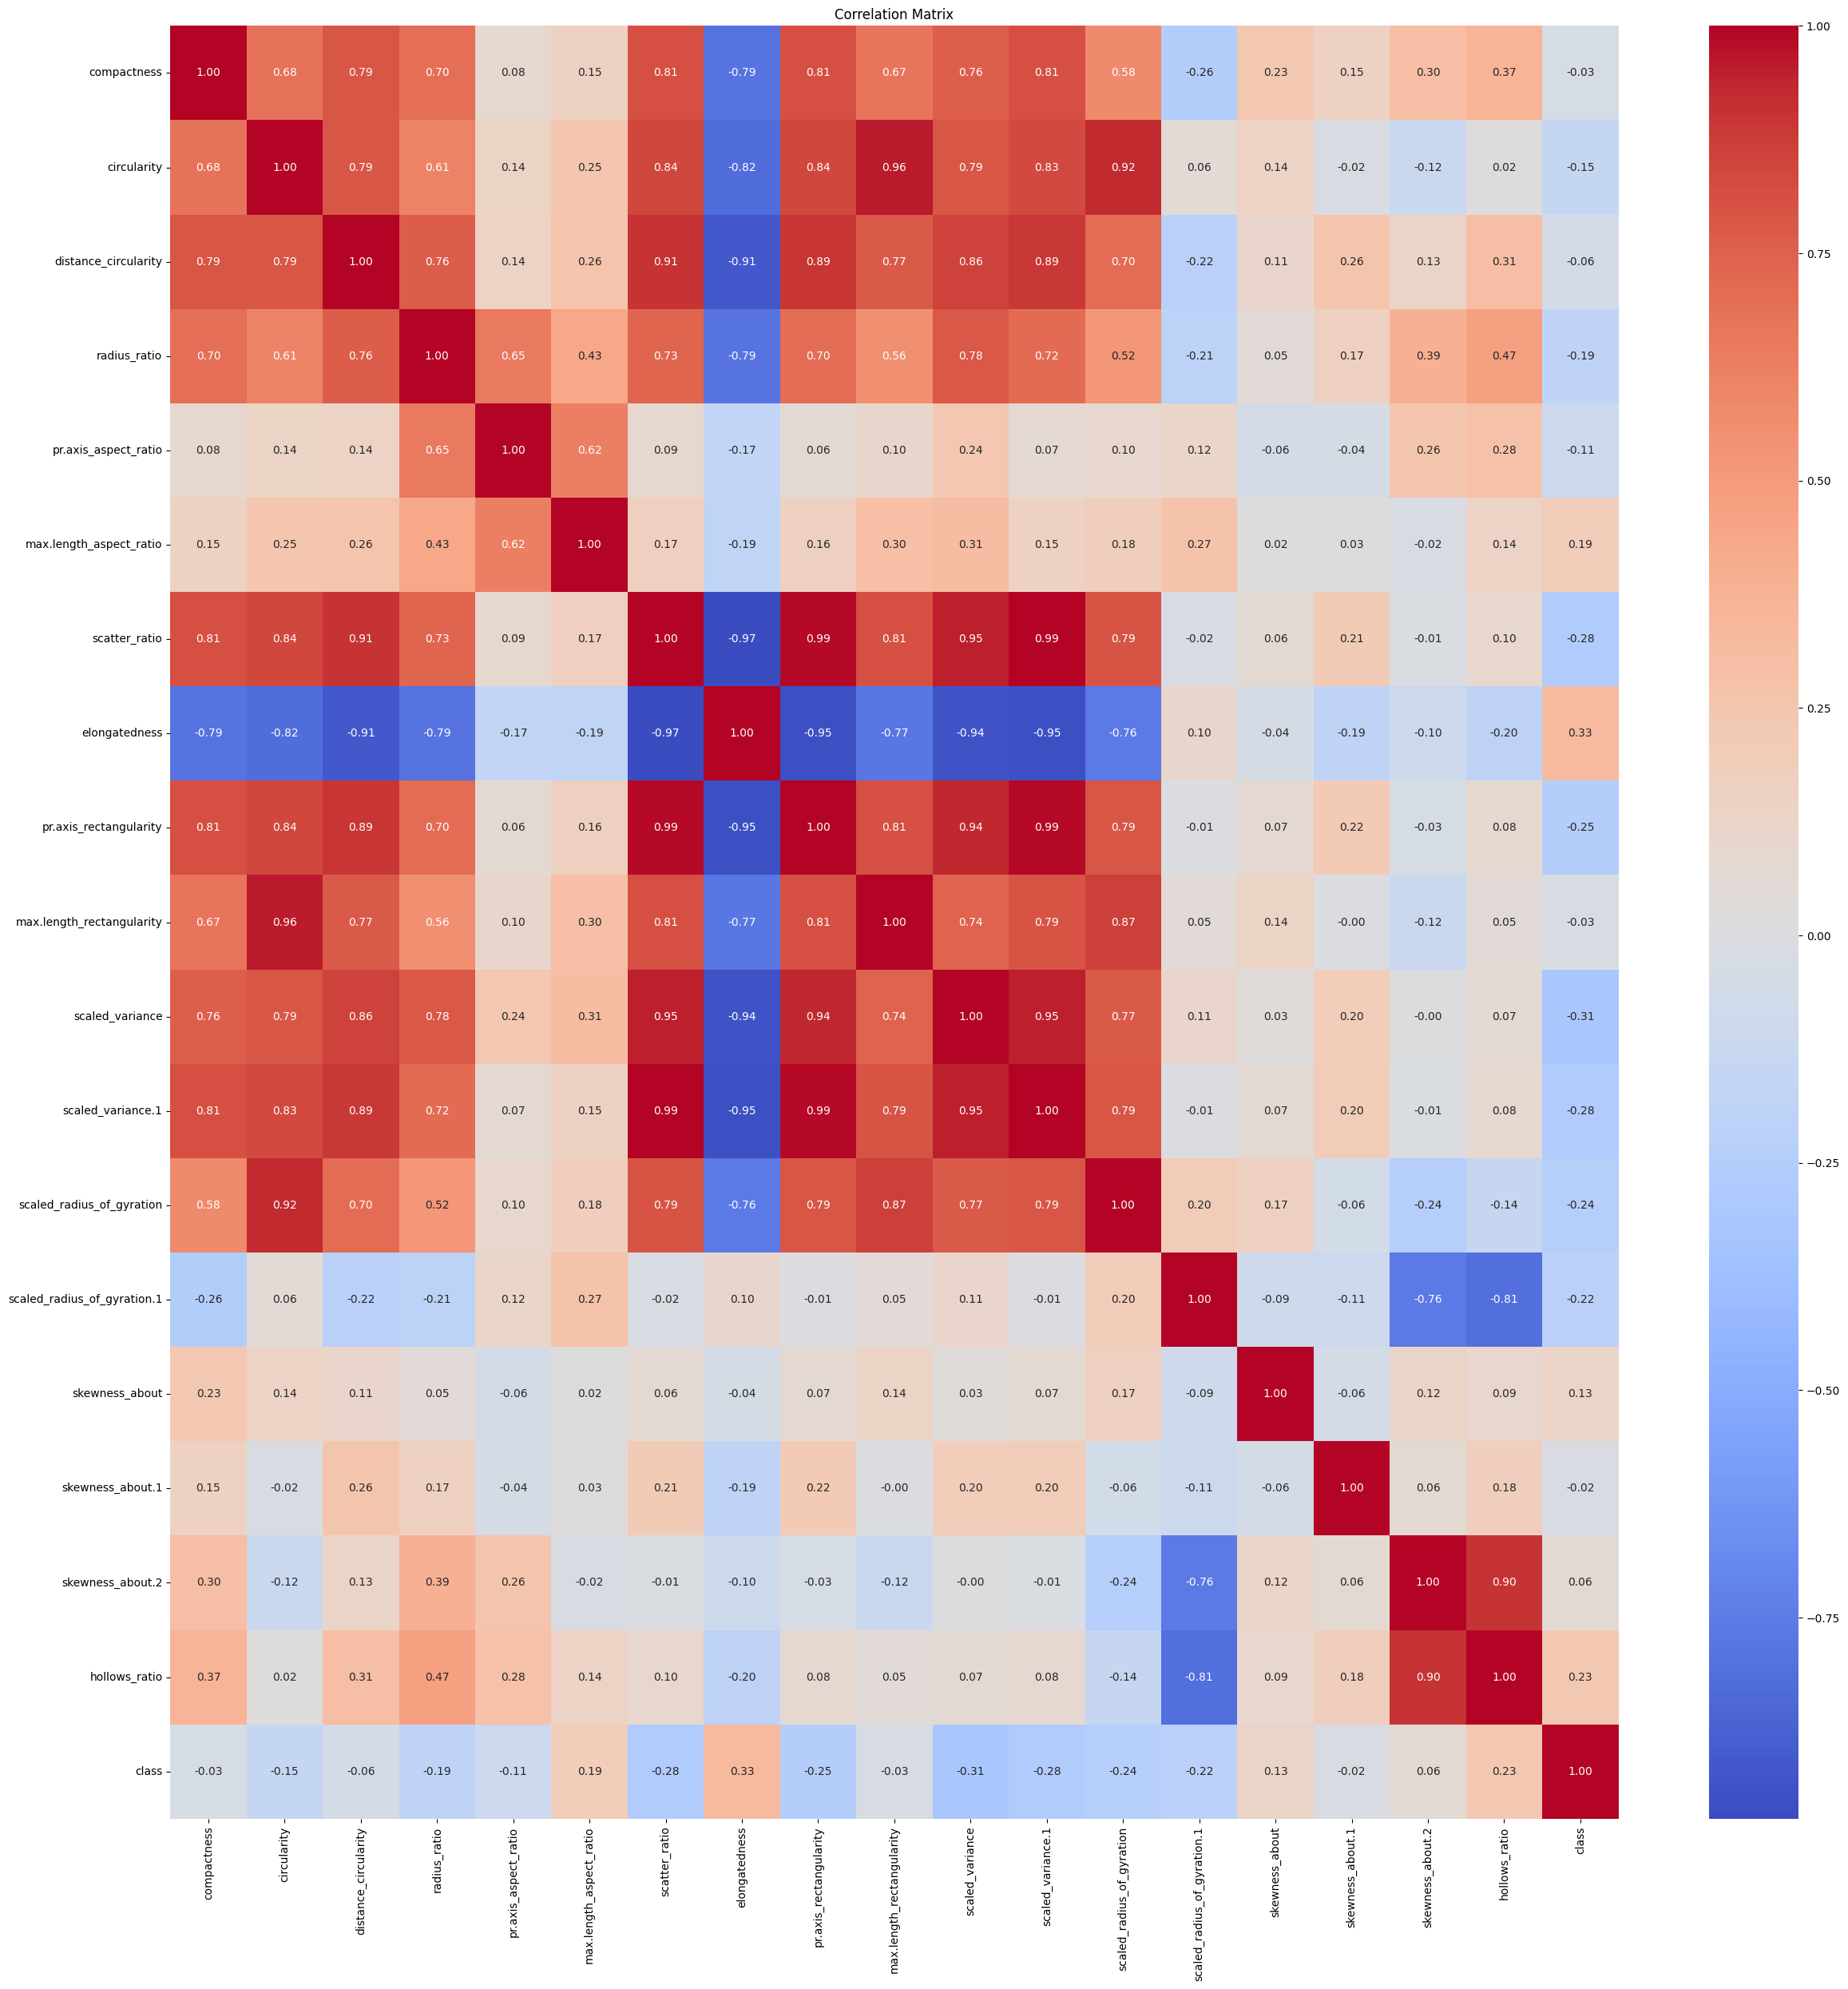

In [15]:
plotCorrelationMatrix(train, figsize = (25,25))

In [16]:
correlation_matrix = train.corr()
correlation_matrix = correlation_matrix.where((correlation_matrix > 0.5) | (correlation_matrix < -0.5))
features_set = set()

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if pd.notna(correlation_matrix.at[row, col]) and row != col:
            features_set.add((row, col))

selected_features = list(set([item for sublist in features_set for item in sublist]))
print("Selected features with correlation > 0.5 or < -0.5 with each other:")
print(selected_features)


Selected features with correlation > 0.5 or < -0.5 with each other:
['scaled_variance', 'scatter_ratio', 'scaled_radius_of_gyration', 'skewness_about.2', 'max.length_aspect_ratio', 'scaled_radius_of_gyration.1', 'circularity', 'radius_ratio', 'max.length_rectangularity', 'pr.axis_rectangularity', 'compactness', 'scaled_variance.1', 'hollows_ratio', 'pr.axis_aspect_ratio', 'elongatedness', 'distance_circularity']


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def evaluate_models(models, X_train, y_train, X_test, y_test, average_type='macro'):
    # Initialize lists to hold evaluation metrics for each model
    train_accuracies = []
    test_accuracies = []
    train_precisions = []
    test_precisions = []
    train_recalls = []
    test_recalls = []
    train_f1_scores = []
    test_f1_scores = []

    # Loop through each model
    for model in models:

        train_pred = model.predict(X_train)

        # Test predictions
        test_pred = model.predict(X_test)

        # Calculate metrics
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        train_precision = precision_score(y_train, train_pred, average=average_type, zero_division=1)
        test_precision = precision_score(y_test, test_pred, average=average_type, zero_division=1)

        train_recall = recall_score(y_train, train_pred, average=average_type, zero_division=1)
        test_recall = recall_score(y_test, test_pred, average=average_type, zero_division=1)

        train_f1_score = f1_score(y_train, train_pred, average=average_type, zero_division=1)
        test_f1_score = f1_score(y_test, test_pred, average=average_type, zero_division=1)

        # Append the results for this model
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        train_precisions.append(train_precision)
        test_precisions.append(test_precision)
        train_recalls.append(train_recall)
        test_recalls.append(test_recall)
        train_f1_scores.append(train_f1_score)
        test_f1_scores.append(test_f1_score)

    # Plot results
    model_names = [model.__class__.__name__ for model in models]

    # Create subplots for each metric
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Accuracy plot
    axes[0, 0].bar(model_names, train_accuracies, label='Train Accuracy', alpha=0.6, color='b')
    axes[0, 0].bar(model_names, test_accuracies, label='Test Accuracy', alpha=0.6, color='g')
    axes[0, 0].set_title('Accuracy')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].set_ylim(0.7, 1)

    # Precision plot
    axes[0, 1].bar(model_names, train_precisions, label='Train Precision', alpha=0.6, color='b')
    axes[0, 1].bar(model_names, test_precisions, label='Test Precision', alpha=0.6, color='g')
    axes[0, 1].set_title('Precision')
    axes[0, 1].set_ylabel('Precision')
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_ylim(0.7, 1)

    # Recall plot
    axes[1, 0].bar(model_names, train_recalls, label='Train Recall', alpha=0.6, color='b')
    axes[1, 0].bar(model_names, test_recalls, label='Test Recall', alpha=0.6, color='g')
    axes[1, 0].set_title('Recall')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].set_ylim(0.7, 1)

    # F1-score plot
    axes[1, 1].bar(model_names, train_f1_scores, label='Train F1 Score', alpha=0.6, color='b')
    axes[1, 1].bar(model_names, test_f1_scores, label='Test F1 Score', alpha=0.6, color='g')
    axes[1, 1].set_title('F1 Score')
    axes[1, 1].set_ylabel('F1 Score')
    axes[1, 1].legend()
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].set_ylim(0.7, 1)

    plt.tight_layout()
    plt.show()


In [18]:
def evaluate_model(model, X_train, y_train, X_test, y_test, average_type='macro'):

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    print("Train Accuracy:", train_accuracy)

    test_accuracy = accuracy_score(y_test, test_pred)
    print("Test Accuracy:", test_accuracy)

    train_conf_matrix = confusion_matrix(y_train, train_pred)
    print("\nTrain Confusion Matrix:")
    print(train_conf_matrix)

    test_conf_matrix = confusion_matrix(y_test, test_pred)
    print("\nTest Confusion Matrix:")
    print(test_conf_matrix)

    train_precision = precision_score(y_train, train_pred, average=average_type, zero_division=1)
    train_recall = recall_score(y_train, train_pred, average=average_type, zero_division=1)
    train_f1_score = f1_score(y_train, train_pred, average=average_type, zero_division=1)

    print("\nTrain Precision:", train_precision)
    print("Train Recall:", train_recall)
    print("Train F1 Score:", train_f1_score)

    test_precision = precision_score(y_test, test_pred, average=average_type, zero_division=1)
    test_recall = recall_score(y_test, test_pred, average=average_type, zero_division=1)
    test_f1_score = f1_score(y_test, test_pred, average=average_type, zero_division=1)

    print("\nTest Precision:", test_precision)
    print("Test Recall:", test_recall)
    print("Test F1 Score:", test_f1_score)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42),
    RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42)
]



for model in models:
    print(f"Evaluating {model.__class__.__name__}...\n")
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test)
    print("\n" + "="*50 + "\n")


Evaluating LogisticRegression...

Train Accuracy: 0.9529569892473119
Test Accuracy: 0.9705882352941176

Train Confusion Matrix:
[[178   9   5]
 [ 11 360   6]
 [  1   3 171]]

Test Confusion Matrix:
[[26  0  0]
 [ 1 50  1]
 [ 0  1 23]]

Train Precision: 0.9480481601024895
Train Recall: 0.9530444507599679
Train F1 Score: 0.9504006916658135

Test Precision: 0.9672294843863471
Test Recall: 0.9732905982905984
Test F1 Score: 0.9701130650709328


Evaluating KNeighborsClassifier...

Train Accuracy: 0.9583333333333334
Test Accuracy: 0.9215686274509803

Train Confusion Matrix:
[[187   3   2]
 [  3 367   7]
 [  5  11 159]]

Test Confusion Matrix:
[[26  0  0]
 [ 2 45  5]
 [ 0  1 23]]

Train Precision: 0.9562191745262613
Train Recall: 0.9520015209885898
Train F1 Score: 0.9539532340761564

Test Precision: 0.9094202898550726
Test Recall: 0.9412393162393163
Test F1 Score: 0.9219818981723744


Evaluating SVC...

Train Accuracy: 0.9798387096774194
Test Accuracy: 0.9803921568627451

Train Confusion Matri

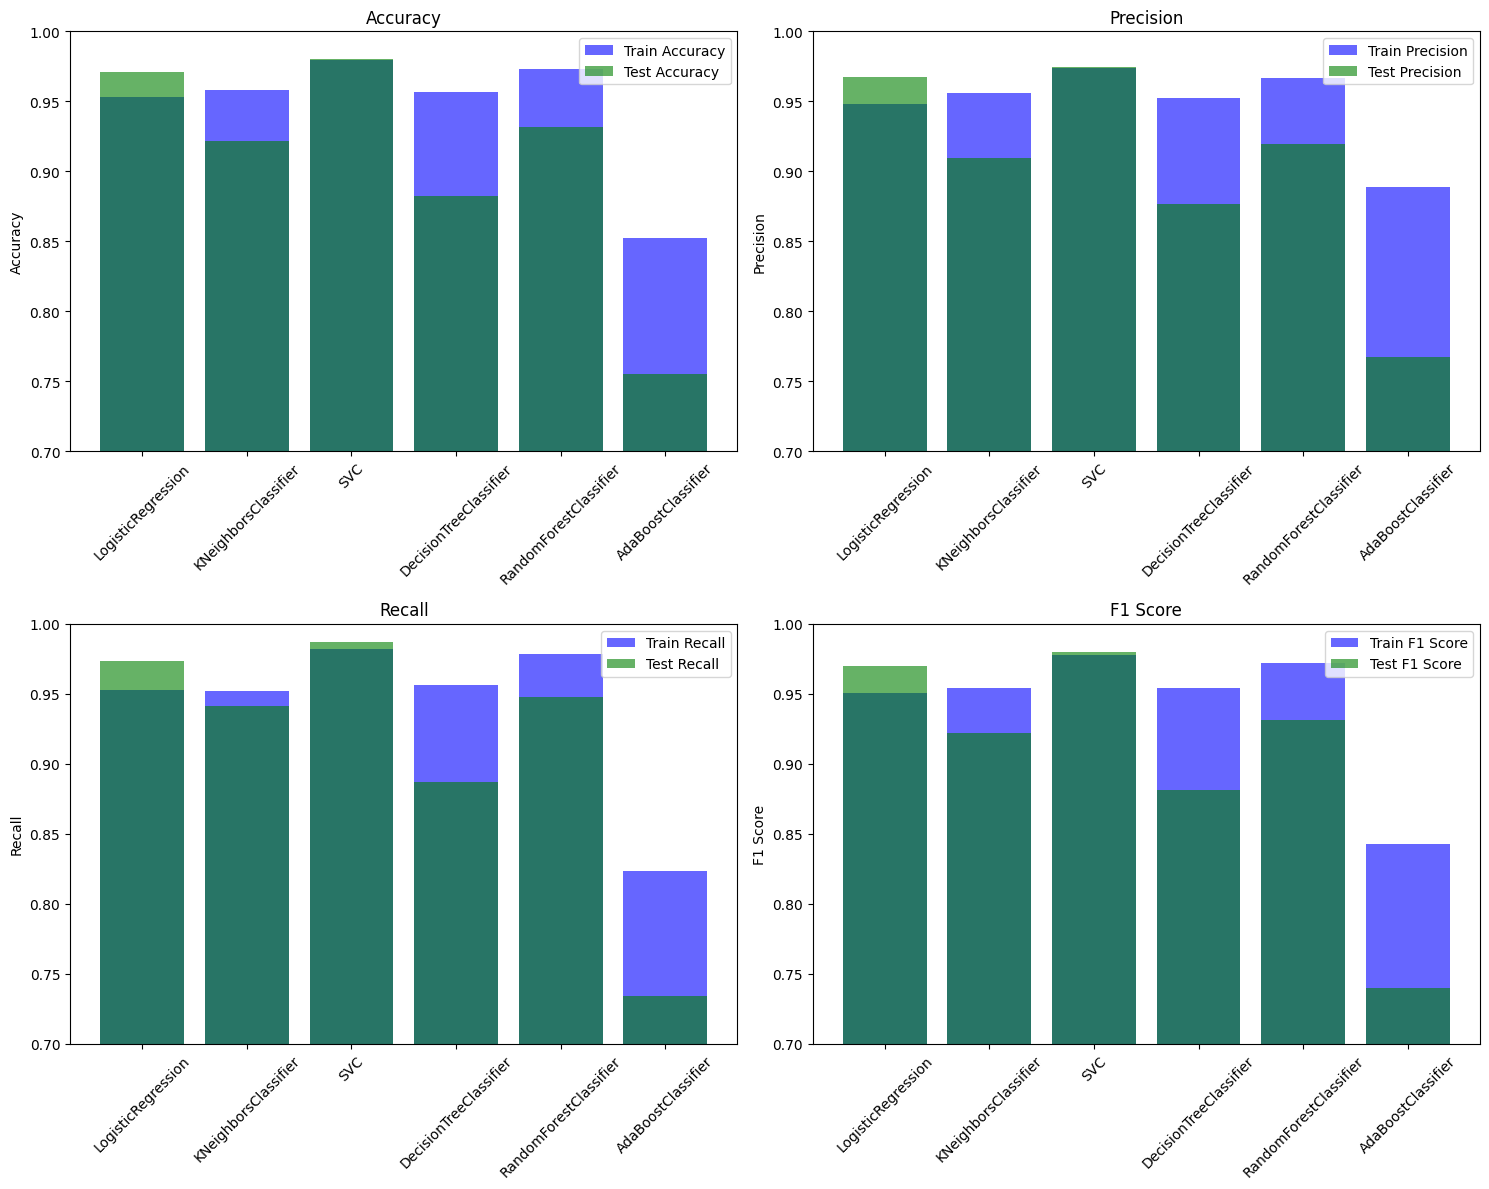

In [20]:
evaluate_models(models, X_train, y_train, X_test, y_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, random_state=42))
]

meta_model = LogisticRegression(max_iter=1000, C=0.1)
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)
evaluate_model(stacking_model, X_train, y_train, X_test, y_test)

Train Accuracy: 0.9852150537634409
Test Accuracy: 0.9509803921568627

Train Confusion Matrix:
[[189   1   2]
 [  2 372   3]
 [  0   3 172]]

Test Confusion Matrix:
[[26  0  0]
 [ 1 48  3]
 [ 0  1 23]]

Train Precision: 0.9835473034561856
Train Recall: 0.9846565144625489
Train F1 Score: 0.9840885685834871

Test Precision: 0.9423900614376804
Test Recall: 0.9604700854700855
Test F1 Score: 0.9505423749922163


In [22]:
import time
start = time.time()
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth = 2, max_features= None, class_weight=None),
                  DecisionTreeClassifier(max_depth = 2, max_features = 'sqrt', class_weight = 'balanced')],
    'n_estimators': [200,  250,  300],
    'learning_rate': [0.02, 0.04, 0.06],
    'random_state': [42]
}
clf = AdaBoostClassifier()
grid = GridSearchCV(estimator = clf,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    n_jobs = -1,
                    cv = 3,
                    verbose = 2)
grid.fit(X_train, y_train)
print(f"Time taken: {time.time() - start}")
evaluate_model(grid.best_estimator_, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Time taken: 43.348172187805176
Train Accuracy: 0.9475806451612904
Test Accuracy: 0.8725490196078431

Train Confusion Matrix:
[[182   5   5]
 [ 13 354  10]
 [  0   6 169]]

Test Confusion Matrix:
[[25  1  0]
 [ 6 40  6]
 [ 0  0 24]]

Train Precision: 0.9405582026338429
Train Recall: 0.9508743316070903
Train F1 Score: 0.9454168504331003

Test Precision: 0.8606871230002623
Test Recall: 0.9102564102564102
Test F1 Score: 0.8754323083694899


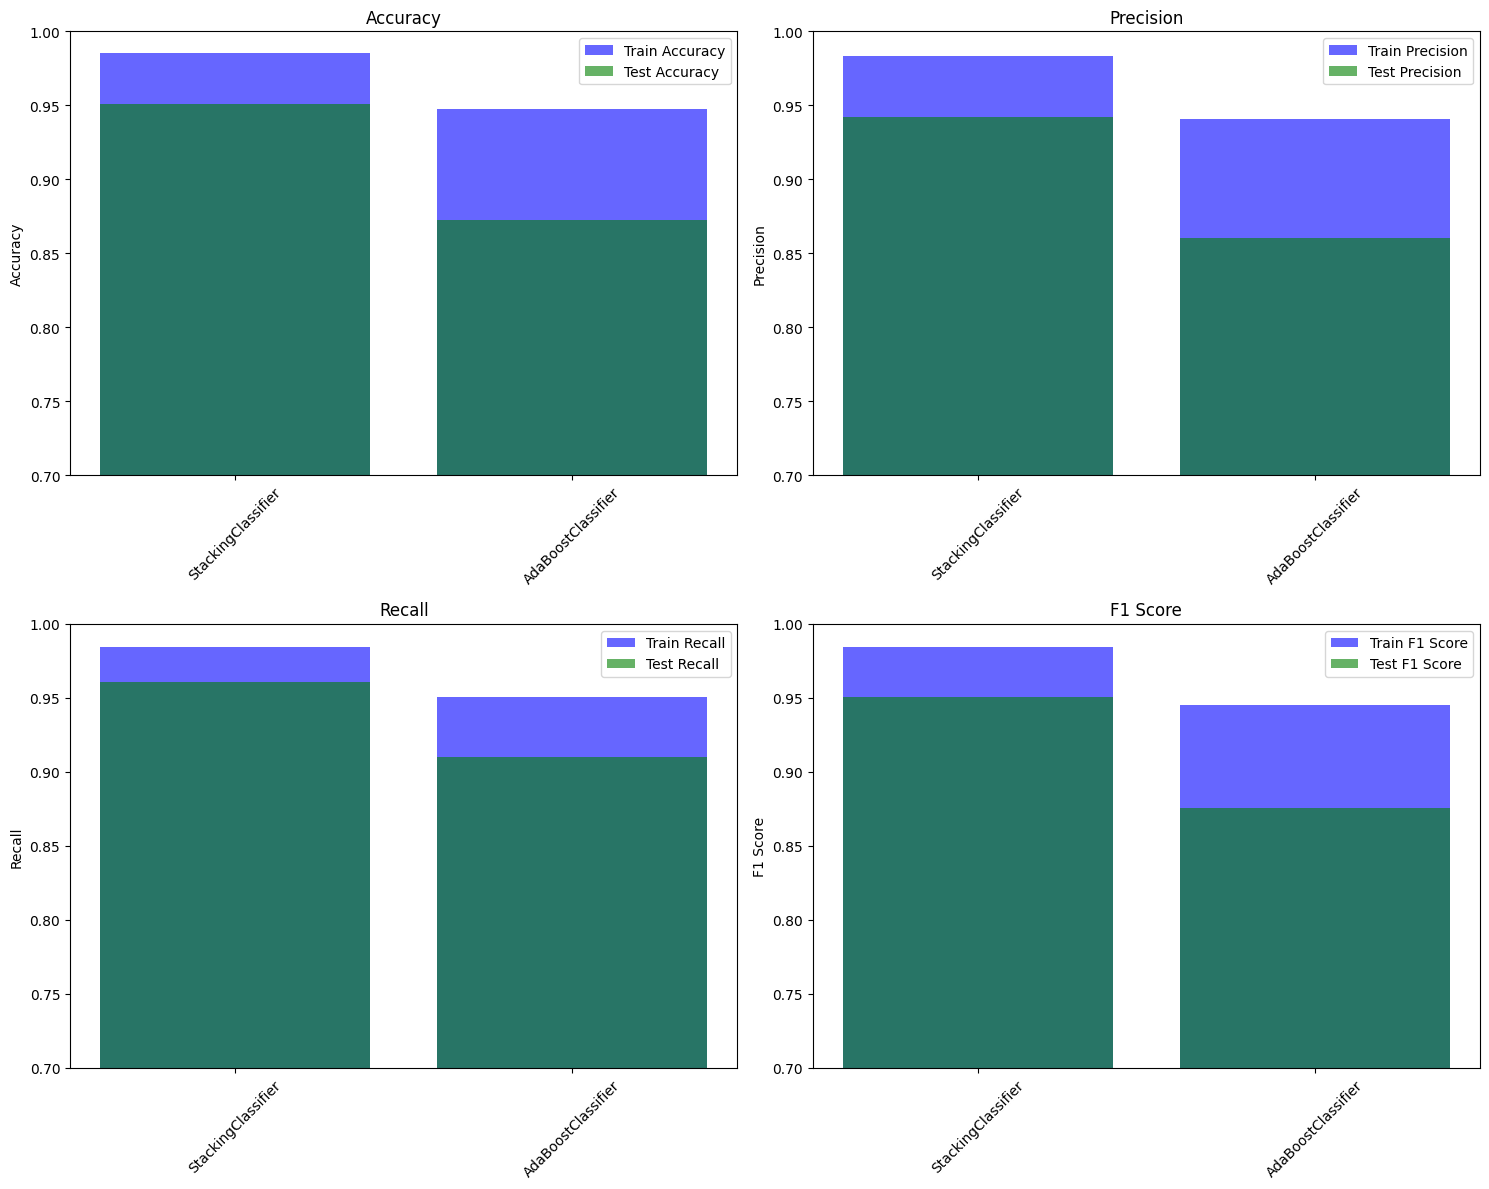

In [24]:
evaluate_models([stacking_model] + [grid.best_estimator_], X_train, y_train, X_test, y_test)